# Shrinked [regularized] linear regression models

Regularization seeks to control variance by adding a tuning parameter.

1.   It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
2.   It reduces the model complexity by coefficient shrinkage.

$\begin{align*} 
\min_{\forall \theta_p}	&\quad\sum_{n=1}^N (y_p - \sum_{p=1}^P x_{np}\theta_p)^2 + \lambda \sum_{p=1}^P \theta_p^{2}\\
\min_{\forall \theta_p}	&\quad\sum_{n\in N} (y_p - \sum_{p\in P} x_{np}\theta_p)^2,\quad
\textrm{s.t.: }\quad \sum_{p\in P} \theta_p^{2} <\varepsilon
\end{align*}$

Regularization strategies are employed to stabilize over-parameterized models


In [1]:
# python libraries in data science numpy as np
# Plotting
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np

# Preprocessing y modeling
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# matplotlib setup
# ==============================================================================
plt.rcParams['image.cmap'] = "RdBu"
plt.rcParams['figure.dpi'] = "90"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['figure.figsize'] = (9, 6)
style.use('ggplot') or plt.style.use('ggplot')

#  warnings 
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### meatspec: Meat spectrometry to determine fat content

A Tecator Infratec Food and Feed Analyzer working in the wavelength range 850 - 1050 nm by the Near Infrared Transmission (NIT) principle was used to collect data on samples of finely chopped pure meat. 215 samples were measured. For each sample, the fat content was measured along with a 100 channel spectrum of absorbances. Since determining the fat content via analytical chemistry is time consuming we would like to build a model to predict the fat content of new samples using the 100 absorbances which can be measured more easily.

In [2]:
# Input Data
# ==============================================================================
datos = pd.read_csv('meatspec.csv')
datos = datos.drop(columns = datos.columns[0]) # dropping all non real-valued data
print(datos.head())
print('dimension ',datos.shape)

        V2       V3       V4       V5       V6       V7       V8       V9  \
0  2.61814  2.61859  2.61912  2.61981  2.62071  2.62186  2.62334  2.62511   
1  2.83871  2.84283  2.84705  2.85138  2.85587  2.86060  2.86566  2.87093   
2  2.58458  2.58629  2.58808  2.58996  2.59192  2.59401  2.59627  2.59873   
3  2.82460  2.82630  2.82814  2.83001  2.83192  2.83392  2.83606  2.83842   
4  2.78989  2.79167  2.79350  2.79538  2.79746  2.79984  2.80254  2.80553   

       V10      V11  ...      V92      V93      V94      V95      V96  \
0  2.62722  2.62964  ...  2.98145  2.96072  2.94013  2.91978  2.89966   
1  2.87661  2.88264  ...  3.29186  3.27921  3.26655  3.25369  3.24045   
2  2.60131  2.60414  ...  2.68951  2.67009  2.65112  2.63262  2.61461   
3  2.84097  2.84374  ...  2.97367  2.94951  2.92576  2.90251  2.87988   
4  2.80890  2.81272  ...  3.30025  3.27907  3.25831  3.23784  3.21765   

       V97      V98      V99     V100   fat  
0  2.87964  2.85960  2.83940  2.81920  22.5  
1  3.2

In [3]:
datos.describe()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,2.839957,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,18.142326
std,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,0.436906,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,12.740297
min,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,2.063470,...,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,0.900000
25%,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,2.524025,...,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230,7.300000
50%,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,2.773640,...,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640,14.000000
75%,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,3.069405,...,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195,28.000000
max,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,4.353300,...,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430,49.100000


### Visual inspection

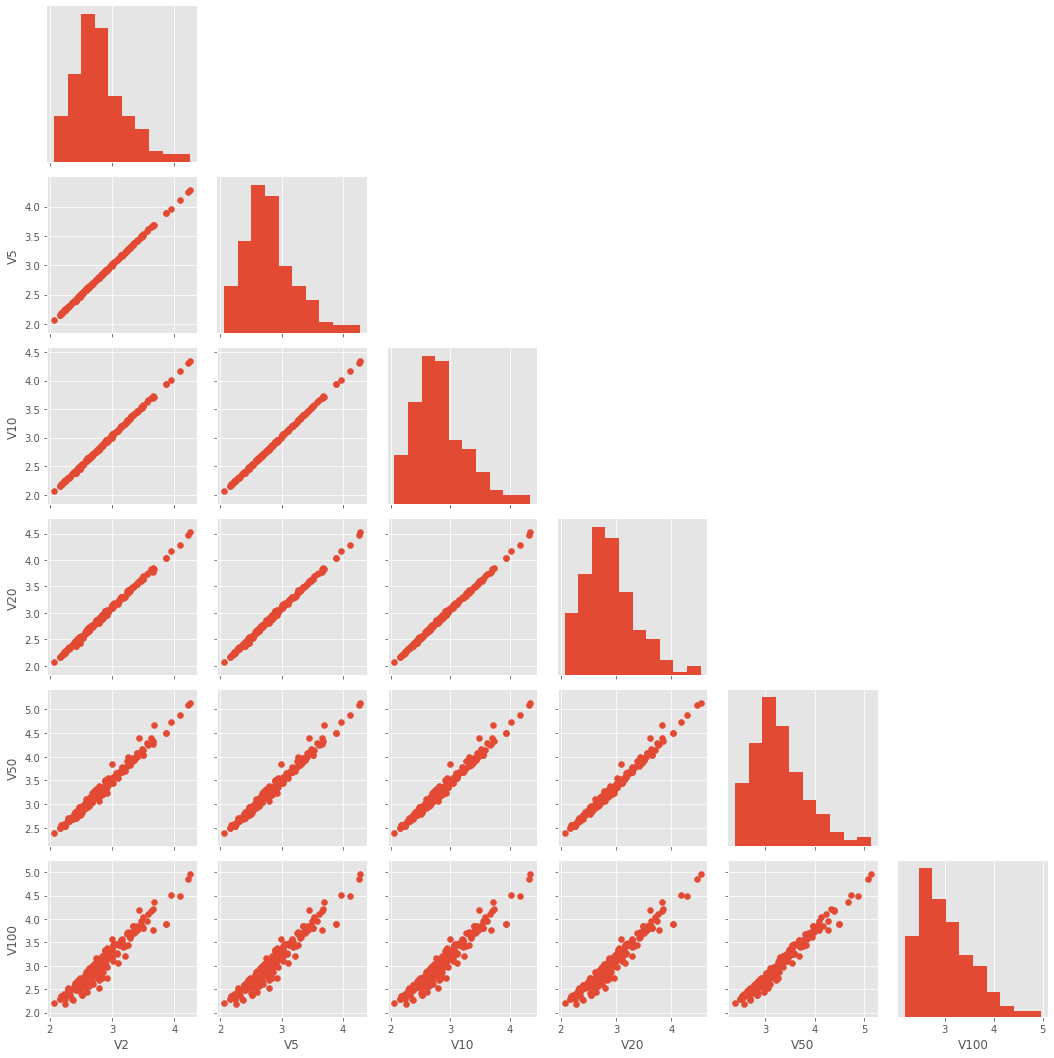

In [4]:
#   scatterplot of few features
 
def better_scatter(x, y, **kwargs):
    plt.scatter(x, y, **kwargs)
    margin = (max(y) - min(y)) * 0.1
    plt.ylim(min(y) - margin, max(y) + margin)

df = datos[['V2', 'V5','V10', 'V20','V50','V100']].dropna()
    
g = sns.PairGrid(df,  diag_sharey=False, corner=True)
g = g.map_diag(plt.hist)
g = g.map_offdiag(better_scatter)

##multicollinearity at glance!

In [5]:
# Correlation between real-valued columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Tidy datasets are easy to manipulate, model and visualize, and 
    have a specific structure: each variable is a column, each observation is 
    a row, and each type of observational unit is a table
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(9))

,variable_1,variable_2,r,abs_r
908,V11,V10,0.999996,0.999996
809,V10,V11,0.999996,0.999996
1009,V12,V11,0.999996,0.999996
910,V11,V12,0.999996,0.999996
807,V10,V9,0.999996,0.999996
708,V9,V10,0.999996,0.999996
1011,V12,V13,0.999996,0.999996
1110,V13,V12,0.999996,0.999996
706,V9,V8,0.999995,0.999995


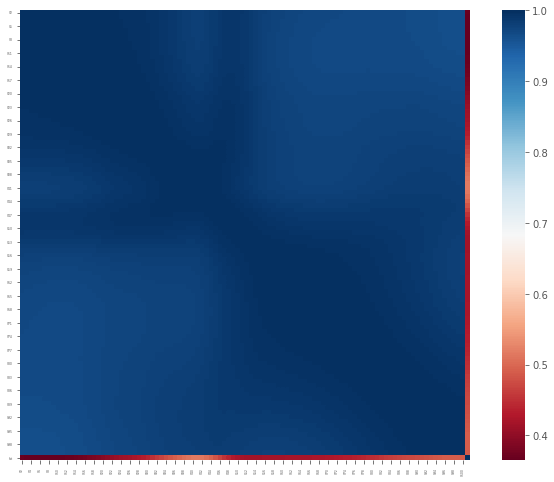

In [6]:
# Heatmap correlation matrix
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(11.7,8.27))

sns.heatmap(
    corr_matrix,
    cmap="RdBu",
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)


Splitting data in train and test  sets: 70%, 30%

In [7]:
# Splitting data in train and test  sets
# ==============================================================================
X = datos.drop(columns='fat')
y = datos['fat']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

## Lineal regression model

$$y_i= \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + ... + \theta_p x_{ip} +\epsilon_i
$$

### Ordinary Least Squares

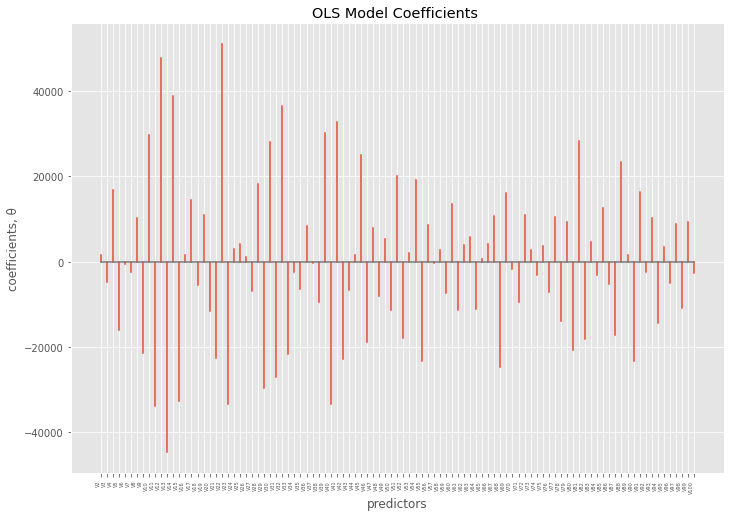

In [8]:
# Building and training of the [Linear] model 
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

# Estimated model coefficients
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('predictors')
ax.set_ylabel('coefficients, θ')
ax.set_title('OLS Model Coefficients ');

In [9]:
# Prediction test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:9]

array([39.06822356, 56.38917473, 64.14900104,  9.76230811, 17.83618923,
        6.75968654, 29.2960073 ,  8.95645047, 15.44537657])

In [10]:
# Error of testing model 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 3.9115383009177482


## Ridge

$$ \sum^n_{i=1}(y_i - \theta_0 - \sum^p_{j=1} \theta_j x_{ij})^2 + \lambda \sum^p_{j=1} \theta_j^2$$

$\lambda $ regularization parameter

Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called $L_2$-norm shrinking (regularization). 



1.  penalizes the size (square of the magnitude) of the regression coefficients
2.  enforces the $\theta_1$ (slope/partial slope) coefficients to be lower, but not 0
3.  does not remove irrelevant features, but minimizes their impact


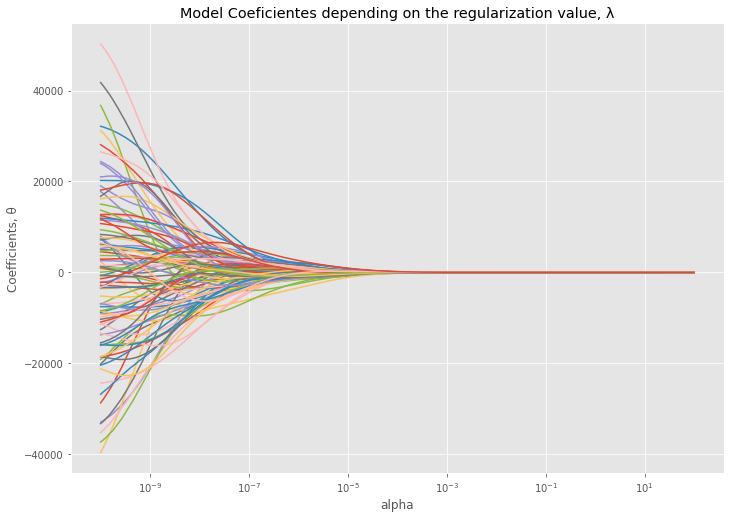

In [11]:
# Building and training of the [Ridge] model  (including searching of optimal alpha  through CV)
# ==============================================================================
#  RidgeCV uses, by deafult,  the mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

# Evolution of coeficients depending on alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients, θ')
ax.set_title('Model Coeficientes depending on the regularization value, λ');
plt.axis('tight')
plt.show()

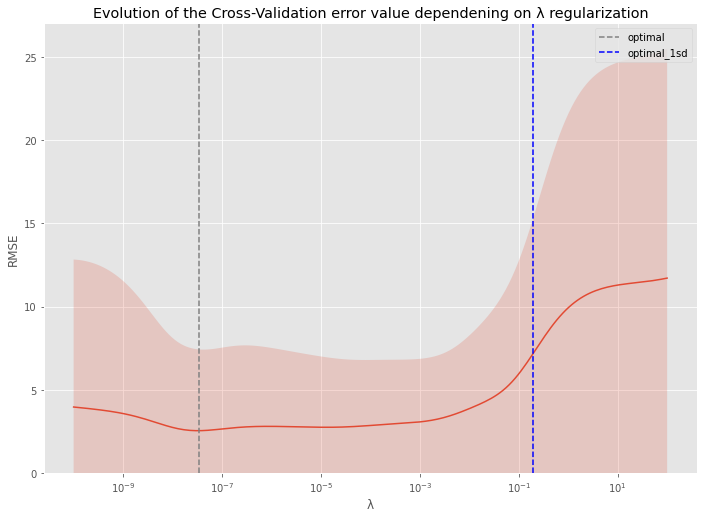

In [12]:
# Evolution of coeficients depending on λ
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de  λ. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'optimal'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'optimal_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolution of the Cross-Validation error value dependening on λ regularization')
ax.set_xlabel('λ')
ax.set_ylabel('RMSE')
plt.legend();

In [13]:
# The best value estimated for alpha
# ==============================================================================
print(f"The best value estimated for alpha: {modelo.alpha_}")

The best value estimated for alpha: 3.4092850697468076e-08


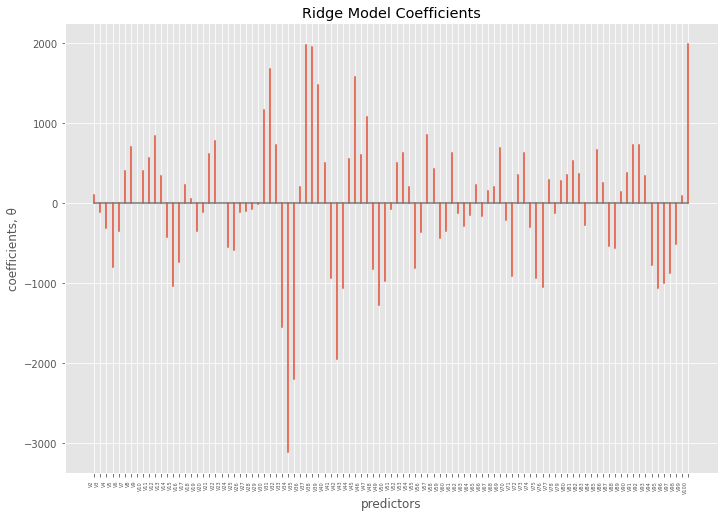

In [14]:
# RIGDE Model Coefficients  
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('predictors')
ax.set_ylabel('coefficients, θ')
ax.set_title('Ridge Model Coefficients');

In [15]:
# Predicction test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:9]

array([43.3514312 , 40.82602613, 51.14220957,  9.94879801, 17.91961223,
        7.71642717, 28.20621113,  8.22219104, 14.84329137])

In [16]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 2.3955156421324793


## Lasso

$$\sum^n_{i=1}(y_i - \theta_0 - \sum^p_{j=1} \theta_j x_{ij})^2 + \lambda \sum^p_{j=1} |\theta_j| $$

Lasso Regression   adds Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called $L_1$-norm Regularization.


1.  regularization term penalizes absolute value of the coefficients
2.  sets irrelevant values to 0
3.  might remove too many features in your model



In [17]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

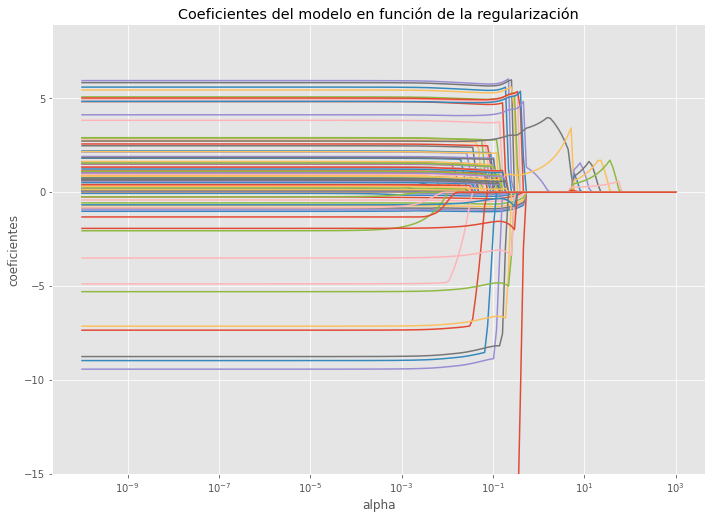

In [18]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

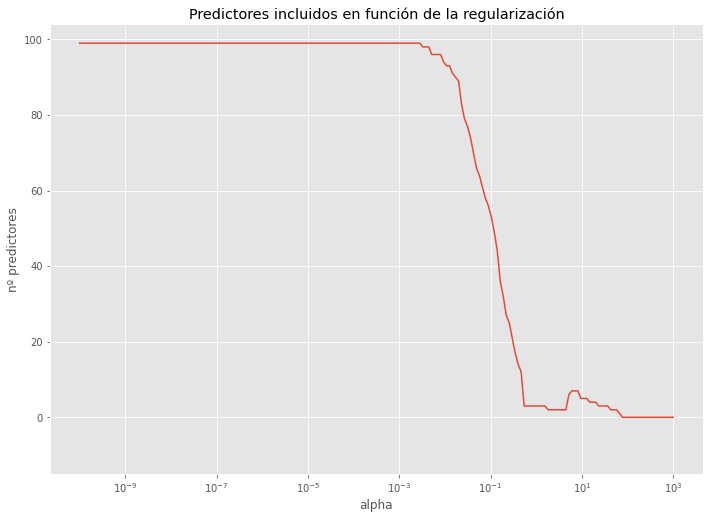

In [19]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

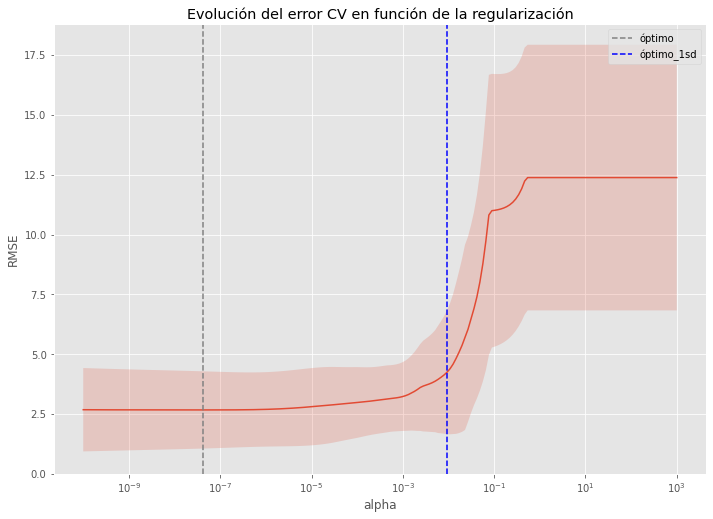

In [20]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [21]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 4.1026581058271906e-08


In [22]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.0093293]


In [23]:
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([0.0093293]), normalize=True)

In [24]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
5,V7,-3.766799
6,V8,-19.022948
7,V9,-17.046360
8,V10,-14.661111
9,V11,-12.697650
10,V12,-10.718818
11,V13,-8.715138
12,V14,-6.577317
13,V15,-4.518882
14,V16,-2.644992


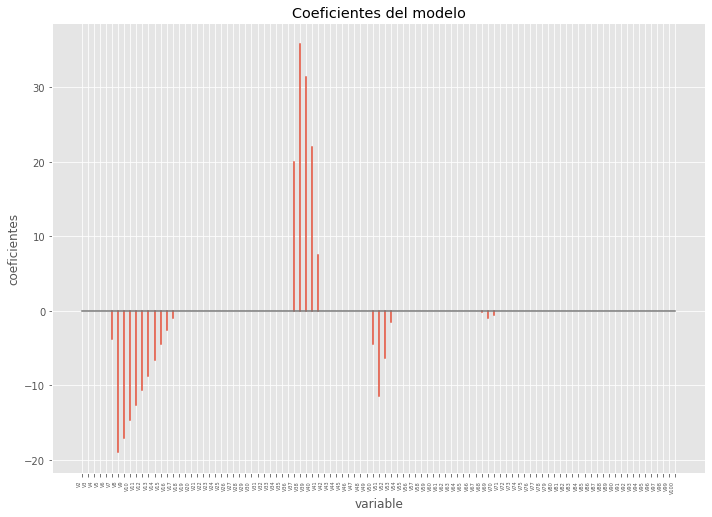

In [25]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [26]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:9]

array([33.81256717, 52.74703313, 35.5471588 , 12.16311461, 15.15159868,
        6.47947406, 24.29350134,  7.53196766, 13.70492965])

In [27]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 3.954949765030573


## Elastic Net
$L_{2,1}$-norm shrinking

$$\frac{\sum^n_{i=1}(y_i - \theta_0 - \sum^p_{j=1} \theta_j x_{ij})^2}{2n} + \lambda (\alpha \sum^p_{j=1} |\theta_j| + \frac{1-\alpha}{2} + \sum^p_{j=1} \theta_j^2
$$

In [28]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [29]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
977,0.90,2.736440e-09,7.175413,2.678696
978,0.90,2.354286e-09,7.175441,2.678701
785,0.70,8.214344e-10,7.175597,2.678731
784,0.70,9.547716e-10,7.175629,2.678736
976,0.90,3.180626e-09,7.175651,2.678741
...,...,...,...,...
1209,0.99,2.582619e+02,153.287425,12.380930
1208,0.99,3.001836e+02,153.287425,12.380930
1207,0.99,3.489101e+02,153.287425,12.380930
1213,0.99,1.414991e+02,153.287425,12.380930


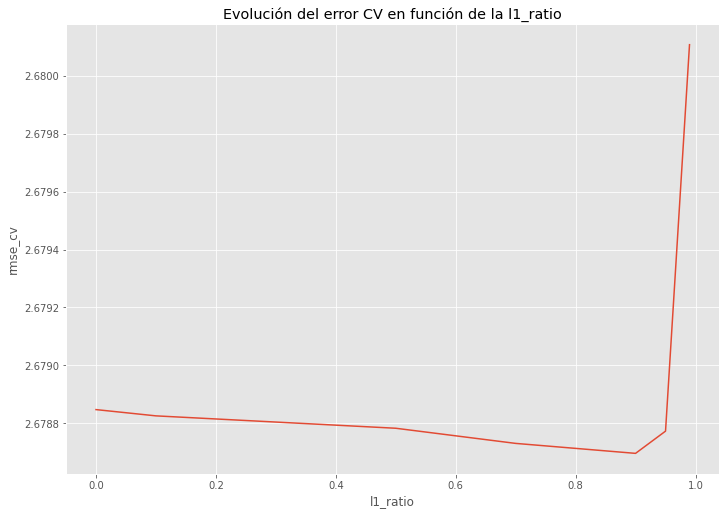

In [30]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(11.7,8.27))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [31]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 2.7364399970746664e-09
Mejor valor de l1_ratio encontrado: 0.9


In [32]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

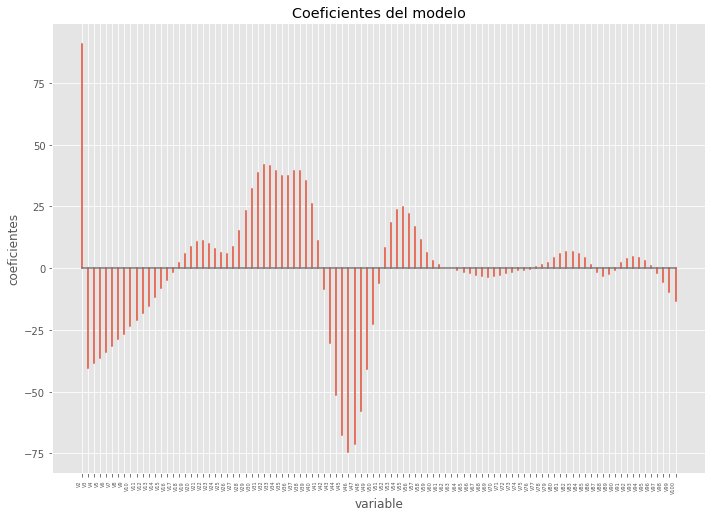

In [33]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [34]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [35]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 5.31838828696895


## Comparación

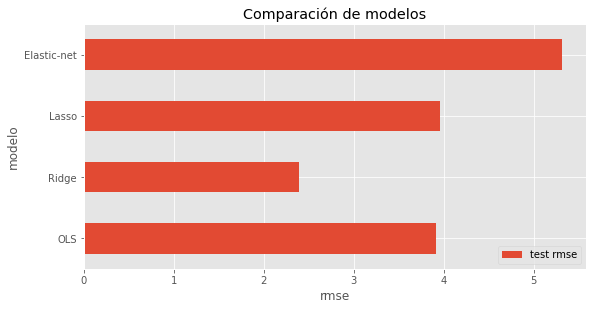

In [36]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(9, 4.5))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## Conclusion : 
 
Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values. 

1.   Ridge Regression adds $L_2$ regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables. 
2.   Lasso Regression adds $L_1$ regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc. 
3.  Elastic Net is a combination of both of the above regularization. It contains both the $L_1$ and $L_2$ as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases. 
 

In [37]:
!pip install sinfo

warnings.filterwarnings('ignore')

     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=78fe2b1558a88e4fbd98b640d84aba1f67acb9d10dc1f61100e6e757e6121c68
  Stored in directory: /root/.cache/pip/wheels/68/ca/56/344d532fe53e855ccd6549795d370588ab8123907eecf4cf30
Successfully built sinfo


In [38]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.2.2
numpy       1.21.6
pandas      1.3.5
scipy       1.4.1
seaborn     0.11.2
sinfo       0.3.4
sklearn     1.0.2
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.10.0
notebook            5.3.1
-----
Python 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
2 logical CPU cores, x86_64
-----
Session information updated at 2022-04-29 01:39



### literature
- https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

- https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/

- https://towardsdatascience.com/ridge-lasso-and-elasticnet-regression-b1f9c00ea3a3
